In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,SGDRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error


In [2]:
%cd C:\Users\Engineer Asad yousuf\Documents\case_3

C:\Users\Engineer Asad yousuf\Documents\case_3


In [3]:
X = pd.read_excel('LearningVariables.xlsx').values
Y = pd.read_excel('LearningY.xlsx').values
x=X
y=Y

In [4]:
sc=StandardScaler()
x_data=sc.fit_transform(x)

In [5]:
mean_x_data=x_data.mean(axis=0)
print("mean after scaling per column ",mean_x_data)
std_x_data=x_data.std(axis=0)
print("std after scaling per column ",std_x_data)

mean after scaling per column  [-3.55271368e-18  0.00000000e+00 -3.01980663e-16 -3.81916720e-17
  2.15827356e-16]
std after scaling per column  [1. 1. 1. 1. 1.]


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.20,random_state=0)

In [7]:
Input=[('polynomial',PolynomialFeatures()),('model',Ridge())]
pipe=Pipeline(Input)
#pipe.get_params().keys()

In [8]:
alpha=[1,0.1,0.01,0.001,0.0001,0]
degree=[1,2,3,4,5,6,7,8,9,10]
grid=GridSearchCV(estimator=pipe, param_grid={'polynomial__degree':degree,'model__alpha':alpha},cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [9]:
grid.fit(x_train,y_train)

C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.01612e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.35853e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.29141e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'polynomial__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [10]:
grid.best_estimator_

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=7)),
                ('model', Ridge(alpha=0.001))])

In [11]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

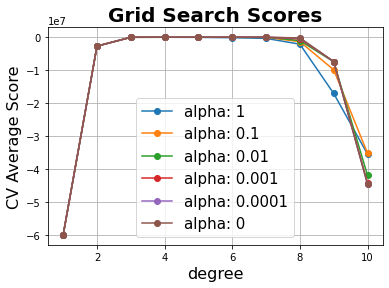

In [12]:
# Calling Method 
plot_grid_search(grid.cv_results_,degree,alpha, 'degree', 'alpha')

So, best alpha=0 and degree=3

In [13]:
Input=[('polynomial',PolynomialFeatures()),('model',Ridge(alpha=0))]
pipe=Pipeline(Input)

In [14]:
mse_test=[]
mse_train=[]
for d in degree:
    Input=[('polynomial',PolynomialFeatures(degree=d)),('model',Ridge(alpha=0))]
    pipe=Pipeline(Input)
    pipe.fit(x_train,y_train)
    y_pred_train=pipe.predict(x_train)
    mse_temp_train=mean_squared_error(y_pred_train,y_train)
    mse_train.append(mse_temp_train)
    y_pred_test=pipe.predict(x_test)
    mse_temp_test=mean_squared_error(y_pred_test,y_test)
    mse_test.append(mse_temp_test)

C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Engineer Asad yousuf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


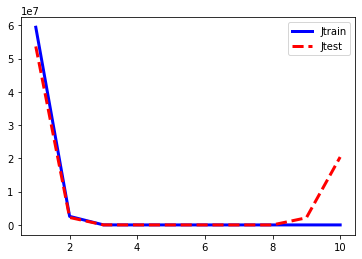

In [15]:
plt.plot(degree,mse_train,label='Jtrain',color='b',linewidth=3)
plt.plot(degree,mse_test,label='Jtest',color='r',linestyle='--',linewidth=3)
plt.legend()
plt.show()

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.25,random_state=0)

In [17]:
data=[1600-0.75*1600,1600-0.5*1600,1600-0.25*1600,1599]

In [18]:
mse_test=[]
mse_train=[]
test=[0.75,0.5,0.25,0]
for t in test:
    x_train,x_t,y_train,y_t=train_test_split(x_train_a,y_train_a,test_size=t,random_state=0)
    Input=[('polynomial',PolynomialFeatures(degree=3)),('model',Ridge(alpha=0))]
    pipe=Pipeline(Input)
    pipe.fit(x_train,y_train)
    y_pred_train=pipe.predict(x_train)
    mse_temp_train=mean_squared_error(y_pred_train,y_train)
    mse_train.append(mse_temp_train)
    y_pred_test=pipe.predict(x_test)
    mse_temp_test=mean_squared_error(y_pred_test,y_test)
    mse_test.append(mse_temp_test)

NameError: name 'x_train_a' is not defined

In [ ]:
mse_test

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

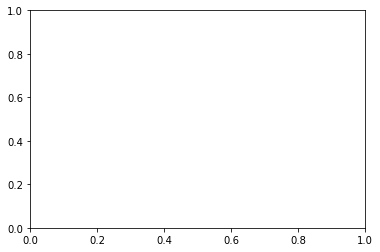

In [19]:
plt.plot(data,mse_train,label='Jtrain',color='b',linewidth=3)
plt.plot(data,mse_test,label='Jtest',color='r',linestyle='--',linewidth=3)
plt.legend()
plt.show()

In [20]:
mse_test=[]
mse_train=[]
for a in alphas:
    Input=[('polynomial',PolynomialFeatures(degree=3)),('model',Ridge(alpha=a))]
    pipe=Pipeline(Input)
    pipe.fit(x_train,y_train)
    y_pred_train=pipe.predict(x_train)
    mse_temp_train=mean_squared_error(y_pred_train,y_train)
    mse_train.append(mse_temp_train)
    y_pred_test=pipe.predict(x_test)
    mse_temp_test=mean_squared_error(y_pred_test,y_test)
    mse_test.append(mse_temp_test)

NameError: name 'alphas' is not defined

In [21]:
plt.plot(alphas,mse_train,label='Jtrain',color='b',linewidth=3)
plt.plot(alphas,mse_test,label='Jtest',color='r',linestyle='--',linewidth=3)
plt.legend()
plt.xlabel('Regularization Parameter (\u03BB)')
plt.ylabel('Cost Function Value')
plt.show()

NameError: name 'alphas' is not defined

In [24]:
Input=[('polynomial',PolynomialFeatures(degree=2)),('model',Ridge(alpha=0))]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', Ridge(alpha=0))])

In [25]:
y_pred=pipe.predict(x_test)

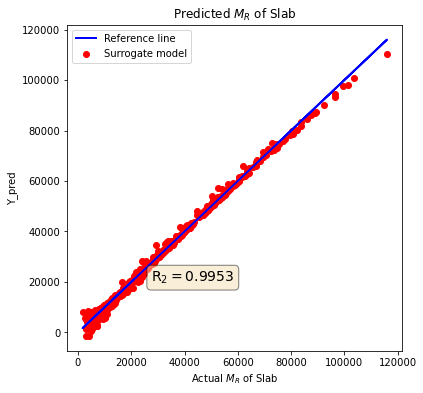

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_test, y_pred, c='red',label='Surrogate model')
ax.plot(y_test,y_test, color='blue', linewidth=2,label='Reference line')
ax.legend()
ax.plot()
ax.set_xlabel("Actual $M_{R}$ of Slab")
ax.set_ylabel("Y_pred")
ax.set_title("Predicted $M_{R}$ of Slab")
R_square=r2_score(y_test,y_pred)
textstr = r'$\mathrm{R_2}=%.4f$' % (R_square)
                                    
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.25, 0.25, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top',bbox=props)
plt.show()